In [38]:
import sqlite3
from sqlite3 import Error
import csv
import matplotlib.pyplot as plt

In [6]:
def connection_olustur(db_file):
    con = None
    try: 
        con = sqlite3.connect(db_file)
        print("connection olusturuldu")
    except Error as e:
        print("Hata oluştu: ", e)
    return con

In [8]:
connection = connection_olustur("emission.db")
cursor = connection.cursor()

connection olusturuldu


In [12]:
cursor.execute("CREATE TABLE IF NOT EXISTS emissions(id INTEGER PRIMARY KEY AUTOINCREMENT,country TEXT, date TEXT, sector TEXT, value REAL, timestamp TEXT)")

In [24]:
with open("dataset.csv", newline='', encoding='utf-8') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        cursor.execute("""
        INSERT INTO emissions (country, date, sector, value, timestamp)
        VALUES (?, ?, ?, ?, ?)
        """, (
            row["country"],
            row["date"],
            row["sector"],
            float(row["value"]) if row["value"] else None,
            row["timestamp"]
        ))
connection.commit()

In [28]:
cursor.execute("SELECT * FROM emissions LIMIT 10")
cursor.fetchall()

[(1, 'Brazil', '01/01/2019', 'Power', 0.096799, '1546300800'),
 (2, 'China', '01/01/2019', 'Power', 14.8161, '1546300800'),
 (3, 'EU27 & UK', '01/01/2019', 'Power', 1.88649, '1546300800'),
 (4, 'France', '01/01/2019', 'Power', 0.051217, '1546300800'),
 (5, 'Germany', '01/01/2019', 'Power', 0.315002, '1546300800'),
 (6, 'India', '01/01/2019', 'Power', 3.34922, '1546300800'),
 (7, 'Italy', '01/01/2019', 'Power', 0.168149, '1546300800'),
 (8, 'Japan', '01/01/2019', 'Power', 1.2958, '1546300800'),
 (9, 'ROW', '01/01/2019', 'Power', 8.57127, '1546300800'),
 (10, 'Russia', '01/01/2019', 'Power', 2.84668, '1546300800')]

In [30]:
cursor.execute("SELECT DISTINCT country FROM emissions")
cursor.fetchall()

[('Brazil',),
 ('China',),
 ('EU27 & UK',),
 ('France',),
 ('Germany',),
 ('India',),
 ('Italy',),
 ('Japan',),
 ('ROW',),
 ('Russia',),
 ('Spain',),
 ('UK',),
 ('US',),
 ('WORLD',)]

In [36]:
cursor.execute("""
SELECT sector, SUM(value) as total_emission
FROM emissions
GROUP BY sector
ORDER BY total_emission DESC
LIMIT 5
""")
results = cursor.fetchall()
for row in results:
    print(f"Sektör: {row[0]}, Toplam Emisyon: {row[1]}")

Sektör: Power, Toplam Emisyon: 369920.034951
Sektör: Industry, Toplam Emisyon: 291974.9585997
Sektör: Ground Transport, Toplam Emisyon: 174271.9527111
Sektör: Residential, Toplam Emisyon: 101101.88394
Sektör: International Aviation, Toplam Emisyon: 12723.98670069


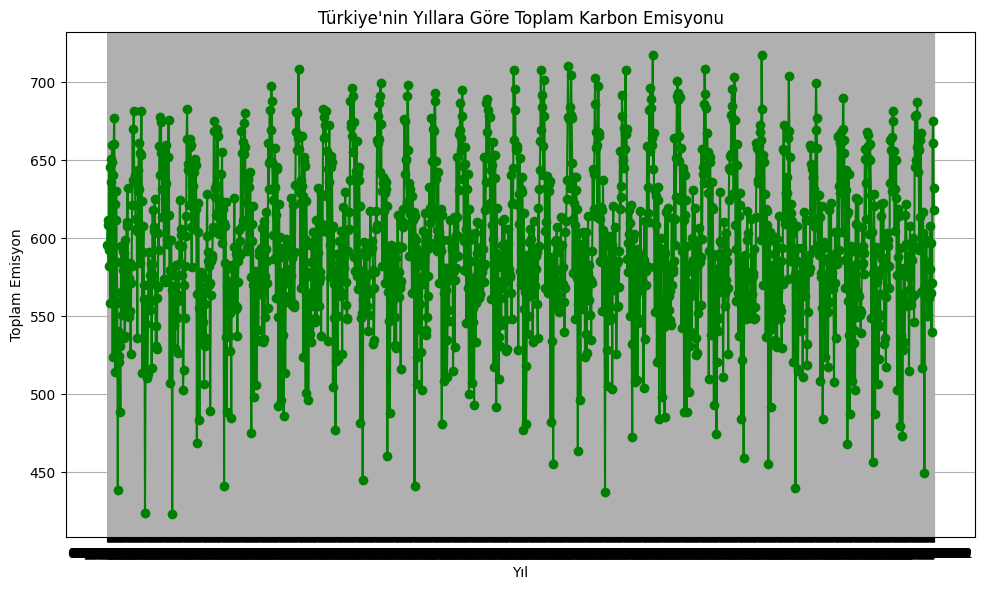

In [42]:
cursor.execute("""
SELECT date, SUM(value) as total
FROM emissions
GROUP BY date
ORDER BY date
""")

data = cursor.fetchall()

years = [row[0] for row in data]
emissions = [row[1] for row in data]

plt.figure(figsize=(10, 6))
plt.plot(years, emissions, marker='o', color='green')
plt.title("Türkiye'nin Yıllara Göre Toplam Karbon Emisyonu")
plt.xlabel("Yıl")
plt.ylabel("Toplam Emisyon")
plt.grid(True)
plt.tight_layout()
plt.show()